<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Melany Carolina López García  <br>
Fecha: 27/07/2022

# Importación de librerias necesarias

In [1]:
#Para esta actividad se importarán las siguientes librerías:
#Importamos la libreria pandas
import pandas as pd 
#Importamos la libreria seaborn
import seaborn as sns
#Importamos la libreria numpy
import numpy as np
#Importamos LabelEncoder desde la libreria sklearn
from sklearn.preprocessing import LabelEncoder
#Importamos train_test_split desde la libreria sklearn
from sklearn.model_selection import train_test_split
#Importamos MinMaxScaler desde la libreria sklearn
from sklearn.preprocessing import MinMaxScaler
# Importamos DecisionTreeClassifier desde la libreria sklearn
from sklearn.tree import DecisionTreeClassifier
# Importamos metrics desde la libreria sklearn
from sklearn import metrics

## Cargar el Dataset

In [3]:
#Código para cargar el Dataset
df = pd.read_csv('https://raw.githubusercontent.com/MelanyL/ML_Foro/master/car_data.csv')
# Mostramos el dataset
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


## Descripción de la fuente del Dataset

Este conjunto de datos contiene detalles de 1000 clientes que tienen la intención de comprar un automóvil, considerando sus salarios anuales.

Columnas que posee son las siguientes:<br>
**User ID:** ID de usuario<br>
**Genderr:** Género del cliente<br>
**Edad:** Edad del cliente<br>
**Annual Salary:** Salario anual del cliente<br>
**Purchased:** posición de compra (No = 0; Sí = 1)<br>

## Explique el problema a resolver. 
El dataset escogido cuenta con 1000 datos, en donde lo que requiere es realizar una predicción sobre cuales clientes pueden comprar un automóvil teniendo en cuenta sus salarios anuales. La variable objetivo dentro de este dataset es Purchased que hace referencia a la posición de compra del cliente, y sus variables de entrada son el ID del usuario, el género, la edad y el salario anual del cliente.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


# Número de instancias en total


In [4]:
#Código que responde a la descripción anterior
#contar registros del dataset
df.count()

User ID         1000
Gender          1000
Age             1000
AnnualSalary    1000
Purchased       1000
dtype: int64

# Número de atributos de entrada, su significado y tipo

**User ID:** es contínuo<br>
**Genderr:** Femenino y Masculino (Categórico)<br>
**Edad:** es contínuo<br>
**Annual Salary:** es contínuo<br>
**Purchased:** 0 = no; 1 = Sí, es categórico<br>

In [5]:
#muestra la información (incluido el tipo de dato) de los 7 atributos de entrada.
df.drop('Purchased', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


# Estadísticas de la variable objetivo.

<AxesSubplot:>

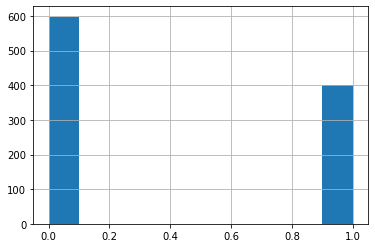

In [6]:
# Instanciamos la libreria matplotlib
%matplotlib inline
#Crear gráfico de barras como la variable objetivo (tipo) continua.
df['Purchased'].hist()

# Estadísticas los atributos en relación con la variable objetivo.

In [9]:
#Creamnos la instancia de labelencoder
labelencoder = LabelEncoder()

#Transformamos los datos de la columna salary
df["User ID"] = labelencoder.fit_transform(df["User ID"])
#Transformamos los datos de la columna workclass
df["Gender"] = labelencoder.fit_transform(df["Gender"])
#Transformamos los datos de la columna education
df["Age"] = labelencoder.fit_transform(df["Age"])
#Transformamos los datos de la columna marital-status
df["AnnualSalary"] = labelencoder.fit_transform(df["AnnualSalary"])
#Transformamos los datos de la columna occupation
df["Purchased"] = labelencoder.fit_transform(df["Purchased"])

In [10]:
#Definición de una función para encontrar la relación estadística de variable objetivo contra todas las variables categóricas
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    #Creación de una lista vacía de predictores o variables de entrada 
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        #Si el valor P de ANOVA es <0.05, eso significa que rechazamos H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [16]:
#Llamar a la función para verificar qué variables categóricas están correlacionadas con la variable objetivo
CategoricalPredictorList=['Gender','Age', 'AnnualSalary'], 
FunctionAnova(inpData=df, 
              TargetVariable='Purchased', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

['Gender', 'Age', 'AnnualSalary'] is correlated with Purchased | P-Value: 5.967609870199763e-15


[['Gender', 'Age', 'AnnualSalary']]

Como se puede apreciar en el análisis realizado la distribución de datos de la variable objetivo es satisfactoria para continuar. Hay un número suficiente de filas para cada tipo de valores de los que puede aprender el modelo. Y se obtuvo la respectiva comprobación de que si tienen correlación la variable objetiva 

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [12]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
# Preparamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((700, 4), (300, 4))

In [13]:
# Instanciamos scaler
scaler = MinMaxScaler()

# entrenamos el modelo
scaler.fit(X_train)

# transformamos los datos de entrenamiento y prueba
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Transformamos los datos de entrenamiento devueltos por el modelo
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# Transformamos los datos de test devueltos por el modelo
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

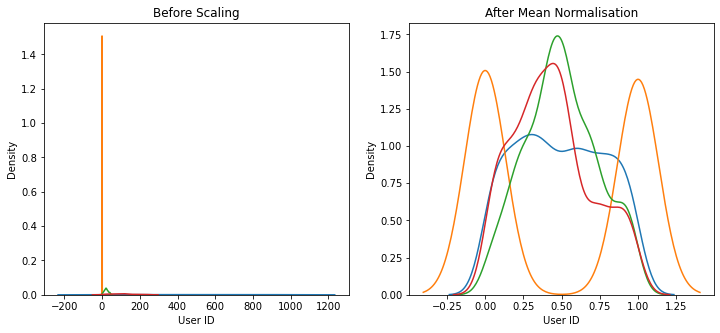

In [15]:
import matplotlib.pyplot as plt
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['User ID'], ax=ax1)
sns.kdeplot(X_train['Gender'], ax=ax1)
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['AnnualSalary'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['User ID'], ax=ax2)
sns.kdeplot(X_train_scaled['Gender'], ax=ax2)
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['AnnualSalary'], ax=ax2)
plt.show()

## División del dataset en datos de entrenamiento y datos de test 

In [17]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
# Asignamos nuestras variables x
X = df[['Gender','Age', 'AnnualSalary']]
# Asignamos nuestra variable y
y = df[['Purchased']]
# Dividimos los datos en entrenamiento y prueb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Verificamos la cantidad de datos
X_train.shape, X_test.shape

((700, 3), (300, 3))

## Modelamiento

In [18]:
# Instanciamos el arbol de decisiones
clf = DecisionTreeClassifier()

In [19]:
#Entrenamos el modelo con los datos de entrenamiento
clf = clf.fit(X_train,y_train)

In [20]:
# Realizamos la prediccion de los datos de prueba
y_pred = clf.predict(X_test)

In [21]:
# Mostramos el accuracy del modelo entrenado
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8833333333333333


## Evaluación del Modelo

El modelo de decision tree entrenado con 1000 datos, posee un nivel de exactitud del 88%, en donde durante el respectivo periodo de prueba se pudo obtener un resultado que se considera óptimo y aceptable para hallar la predicción sobre si un cliente puede o no comprar un automóvil.